**Imporing Libraries**

In [310]:
#inporting general libraries
import sys
import os
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Iris Dataset**

In [311]:
from sklearn.datasets import load_iris
import pandas as pd

#loading dataset
iris_data = load_iris()
#df1 = pd.DataFrame(data.data, columns=data.feature_names)
df= pd.DataFrame(data= np.c_[iris_data['data'],iris_data['target']], columns= iris_data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Data Manipulation and analysis**

In [312]:
df.shape

(150, 5)

In [313]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [314]:
#finding correlation 
df.corr() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [315]:
df.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [316]:
#Describes data 

df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Dividing dataset into Train data and Test data**

In [317]:
x, y = iris_data.data, iris_data.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

**Prepare data for ML, data cleaning, Standardization**

In [318]:
iris_data = sns.load_dataset("iris")

In [319]:

#sns.relplot(data=iris_data)
#sns.displot(data= iris_data )
#sns.catplot(data= iris_data)
#sns.pairplot(iris_data, markers='*')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [321]:
# df['sepal length (cm)'].hist()
# df['sepal width (cm)'].hist()
# df['petal length (cm)'].hist()
# df['petal width (cm)'].hist()


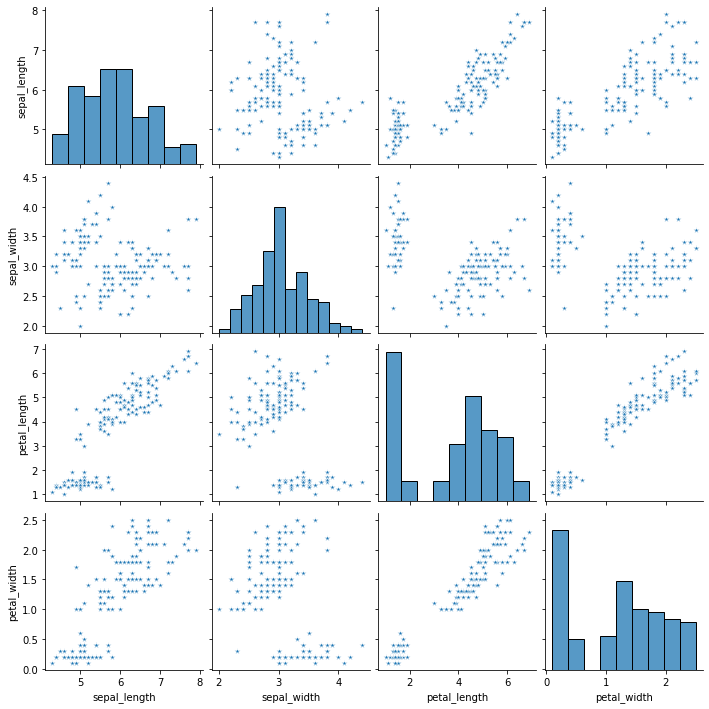

In [322]:
sns.pairplot(iris_data, markers='*')

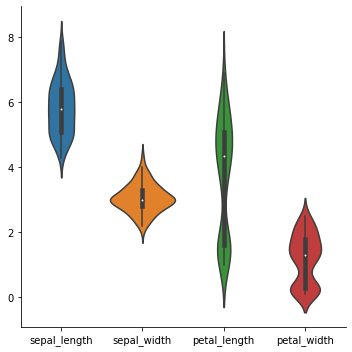

In [323]:
sns.catplot(data=iris_data, kind="violin")

In [324]:
#Standardization
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
std_slc.fit(x)
X_train_std = std_slc.transform(x_train)
X_test_std = std_slc.transform(x_test)


In [325]:
#Standardized Training and Test data  
print(x[0:5])
print('\n')
print(X_train_std[0:5])
print('\n')
print(x_test[0:5])
print('\n')
print(X_test_std[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


[[ 0.67450115  0.09821729  0.99010798  0.79067065]
 [ 0.55333328 -1.28296331  0.64908342  0.3957741 ]
 [ 0.4321654  -0.59237301  0.59224599  0.79067065]
 [ 1.52267624 -0.13197948  1.21745768  1.18556721]
 [-0.53717756  1.93979142 -1.39706395 -1.05217993]]


[[6.4 3.2 5.3 2.3]
 [4.4 2.9 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [5.9 3.2 4.8 1.8]
 [4.9 3.  1.4 0.2]]


[[ 0.67450115  0.32841405  0.87643312  1.44883158]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-0.90068117  1.70959465 -1.2833891  -1.18381211]
 [ 0.06866179  0.32841405  0.59224599  0.79067065]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]]


**SVM - Support Vector Machine**

In [326]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Linear support vector machine

LSVC=LinearSVC()
LSVC.fit(x_train, y_train)
L_pred=LSVC.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [327]:
#Linear Support Vector machine confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,L_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, L_pred))

Confusion Matrix:

[[24  0  0]
 [ 0 24  4]
 [ 0  3 20]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.89      0.86      0.87        28
           2       0.83      0.87      0.85        23

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



In [328]:
##Linear Support Vector machine Accuracy score
print('Accuracy Score : ')
accuracy_score(y_test, L_pred)

Accuracy Score : 


0.9066666666666666

In [329]:
#Root Mean square error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
import math
mse = sklearn.metrics.mean_squared_error(y_test, L_pred)

#Square root of mean square error
rmse = math.sqrt(mse)
print(rmse)

0.30550504633038933


In [330]:
#RBF Kernel Support Vector machine Model training and prediction 

RBFSVC=SVC(kernel='rbf', random_state=0, gamma=.60, C=1.0)
RBFSVC.fit(x_train, y_train)
RBFSVC_pred=RBFSVC.predict(x_test)

In [331]:
#RBF Kernel Support Vector machine confusion matrix
print('Confusion Matrix :\n')
print(confusion_matrix(y_test,RBFSVC_pred))

#RBF Kernel Support Vector machine classification report
print('\nClassification Report:\n')
print(classification_report(y_test, RBFSVC_pred))

Confusion Matrix :

[[24  0  0]
 [ 0 26  2]
 [ 0  0 23]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.93      0.96        28
           2       0.92      1.00      0.96        23

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



In [332]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.933, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


In [333]:
#Accuracy score 
accuracy_score(y_test, RBFSVC_pred)

0.9733333333333334

**K Nearest Neighbors**

In [334]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [335]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [336]:
# kn = KNeighborsClassifier(5)
# kn.fit(x_train, y_train)
# kn_pred=kn.predict(x_test)
# print(confusion_matrix(y_test,kn_pred))
# print(classification_report(y_test, kn_pred))
#accuracy_score(y_test, kn_pred)

In [337]:
# experimenting with different n values
err = []
for k in range(9,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    err.append(metrics.accuracy_score(y_test, knn_pred))
print(metrics.accuracy_score(y_test, knn_pred))


0.96


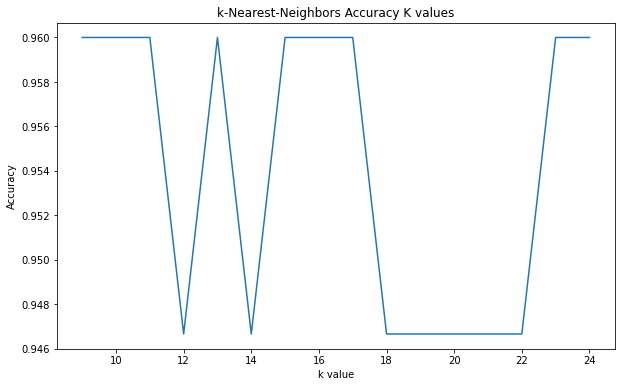

In [338]:
plt.figure(figsize=(10,6))
plt.plot(range(9,25), err)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('k-Nearest-Neighbors Accuracy K values')
plt.show()

In [339]:
knn_pred=knn.predict(x_test) 
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,knn_pred))


Confusion Matrix:

[[24  0  0]
 [ 0 27  1]
 [ 0  2 21]]


In [340]:
print('\nClassification Report:\n')
print(classification_report(y_test, knn_pred))



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.93      0.96      0.95        28
           2       0.95      0.91      0.93        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [341]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}


In [ ]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

In [ ]:
print('Accuracy Score :')
accuracy_score(y_test, knn_pred)